In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [3]:
import pandas as pd
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Tweets,Class
0,0,Kahramanmaraş türkoğlu ilçesi şekeroba köyü ça...,1.0
1,1,"Teyitli, ses var, köpekler tepki veriyor. Her...",1.0
2,2,0539 693 27 99 bu arkadaş Kahramanmaraş’ta çad...,1.0
3,3,Babamın yaşadığı yere henüz yardım ulaşmamış ş...,1.0
4,4,Samsun Atakum'da 18 adet yeni eşyalı daire var...,1.0


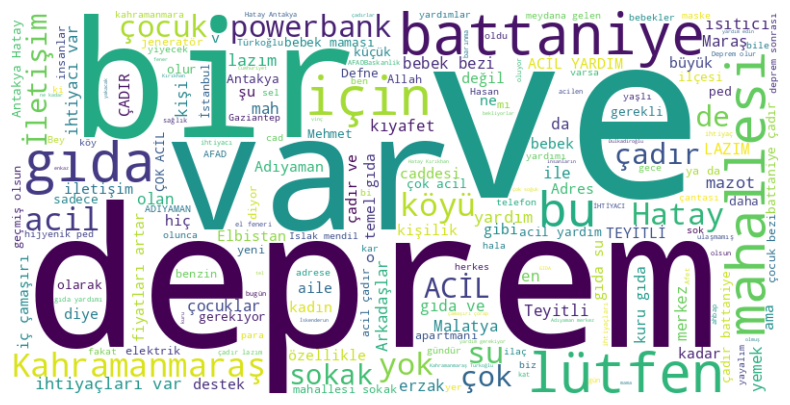

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

text = ' '.join(df['Tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
import pandas as pd
import numpy as np
import re

# If you haven't already downloaded NLTK stopwords:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ------------------------
# 1. Load your dataframe
# ------------------------
# Assume 'df' is already loaded, has columns: 'Unnamed: 0', 'Tweets', 'Class'.
# For clarity, let's just keep the relevant columns:
# df = df[['Tweets', 'Class']]

# If you want to drop any missing or empty rows:
# df = df.dropna(subset=['Tweets'])

# ------------------------
# 2. Text Preprocessing
# ------------------------
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove @mentions and hashtags if desired
    text = re.sub(r'@\w+|#', '', text)
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zğüşöçİı]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_tweets'] = df['Tweets'].apply(preprocess_text)

# Optionally remove Turkish stopwords if that’s appropriate:
# This example uses built-in NLTK English stopwords for demonstration;
# you can customize for Turkish or any other language:
#turkish_stopwords = set(stopwords.words('english'))  # Replace with Turkish stopwords if needed

# ------------------------
# 3. Vectorization
# ------------------------
# You can adjust 'max_features' (number of features) or 'min_df', 'max_df' thresholds based on your dataset.
vectorizer = CountVectorizer(
                             max_features=1000,  # or None if you want all features
                             min_df=2,           # ignore words that appear in fewer than 2 documents
                             max_df=0.95)        # ignore words that appear in more than 95% of documents

dtm = vectorizer.fit_transform(df['cleaned_tweets'])

# ------------------------
# 4. LDA Model Training
# ------------------------
# Choose the number of topics (n_components) based on domain knowledge or experimentation
n_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method='batch',
    max_iter=10
)
lda_model.fit(dtm)

# ------------------------
# 5. Inspect Topics
# ------------------------
def print_top_words(model, feature_names, n_top_words=10):
    """
    Utility to print the top words per topic.
    """
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        # Sort words in descending order of weight and pick the top n words
        top_features_ind = topic.argsort()[::-1][:n_top_words]
        top_words = [feature_names[i] for i in top_features_ind]
        print("  ".join(top_words))
        print()

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

print("Top words for each topic:")
print_top_words(lda_model, feature_names, n_top_words=20)

# ------------------------
# 6. Get Topic Distribution for Each Document
# ------------------------
# The transform() method returns the document-topic matrix of shape [n_docs, n_topics].
doc_topic_distributions = lda_model.transform(dtm)

# If you'd like, you can add the topic with the highest probability as a label back to your dataframe
df['predicted_topic'] = doc_topic_distributions.argmax(axis=1)

# ------------------------
# 7. (Optional) Examine results
# ------------------------
print(df[['Tweets', 'predicted_topic']].head())



Top words for each topic:
Topic #0:
deprem  ve  bir  de  ne  da  için  ile  var  battaniye  bu  meydana  kadar  daha  değil  olur  gelen  olan  her  yeni

Topic #1:
gıda  deprem  artar  bir  fiyatları  ve  olur  çadır  da  battaniye  bezi  su  çok  bebek  iç  yangın  çamaşırı  şu  lazım  ped

Topic #2:
deprem  ve  bir  de  bu  da  için  olsun  maraş  diye  geçmiş  bebek  afad  bezi  biz  olsa  özellikle  sonrası  her  kadın

Topic #3:
ve  var  gıda  mahallesi  çadır  acil  no  yardım  lütfen  aci  hatay  battaniye  çok  kahramanmaraş  köyü  ihtiyaçları  sokak  ihtiyacı  letişim  bebek

Topic #4:
ve  var  deprem  hatay  powerbank  için  su  bir  mazot  battaniye  bu  antakya  el  aci  çok  sokak  her  feneri  yok  mah

                                              Tweets  predicted_topic
0  Kahramanmaraş türkoğlu ilçesi şekeroba köyü ça...                3
1  Teyitli, ses var, köpekler tepki veriyor.  Her...                4
2  0539 693 27 99 bu arkadaş Kahramanmaraş’ta çad...          

In [18]:
!pip install pyLDAvis.sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [23]:
import pyLDAvis

topic_term_matrix = lda_model.components_
doc_topic_matrix  = lda_model.transform(dtm)

doc_term_matrix = dtm.toarray()      # If your dtm is large, watch out for memory usage!
doc_lengths     = doc_term_matrix.sum(axis=1)
term_frequency  = doc_term_matrix.sum(axis=0)
vocab           = vectorizer.get_feature_names_out()

# IMPORTANT: The pyLDAvis prepare function expects normalized topic-term distributions
# so each row of topic_term_matrix should sum to 1.
topic_term_dists = (topic_term_matrix.T / topic_term_matrix.sum(axis=1)).T

data_prepared = pyLDAvis.prepare(
    topic_term_dists = topic_term_dists,
    doc_topic_dists   = doc_topic_matrix,
    doc_lengths       = doc_lengths,
    vocab             = vocab,
    term_frequency    = term_frequency
)

pyLDAvis.display(data_prepared)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
